In [57]:
import os
import glob
import re
import pandas as pd

In [58]:
scenes = ["scene0000_01", "scene0079_00", "scene0158_00", "scene0316_00", "scene0521_00", "scene0553_00", "scene0616_00"]


In [89]:
filepaths = glob.glob("./logs/*/nerf/results/depth_evaluation.txt")
# filepaths = filter(os.path.isfile, filepaths)

columns = ['exp_name', 'scene', 'factor', 'netdepth', 'netwidth', 'abs_rel', 'sq_rel', 'rmse', 'rmse_log', 'a1', 'a2', 'a3']
df = pd.DataFrame(columns=columns)
df = df.set_index('exp_name')

exp_name_regex = r"logs\/(.*)\/nerf\/results\/depth_evaluation\.txt"
settings_regex = r"f(\d*)d(\d*)w(\d*)"

for filepath in filepaths:
    exp_name = re.search(exp_name_regex, filepath).group(1).split('_')
    scene = "_".join(exp_name[:-1])
    exp_name = "_".join(exp_name)
    if scene:
        with open(filepath, 'r') as file:
            # get second line
            data = file.read().split('\n')[1]
            # print(data)
            # discard double slash
            data = data.split('\\')[0]
            # discard double slash
            data = data.split('& ')
            # remove whitespace and convert to float
            data = map(lambda s: float(s.strip()), data[1:])
            # convert yo dictionary with column names as keys
            data = dict(zip(columns[-7:], data))
            
            # add setting data
            settings = re.search(settings_regex, exp_name)
            factor, netdepth, netwidth = settings.groups(1)
            data['scene'] = scene
            data['factor'], data['netdepth'], data['netwidth'] = int(factor), int(netdepth), int(netwidth)
            
            df.loc[exp_name] = data
            # df.concat(data, ignore_index=True)
df

,scene,factor,netdepth,netwidth,abs_rel,sq_rel,rmse,rmse_log,a1,a2,a3
exp_name,,,,,,,,,,,
scene0000_01_f4d08w0384,scene0000_01,4,8,384,0.0378,0.0068,0.1217,0.0509,0.9884,0.9992,0.9999
scene0000_01_f4d08w0192,scene0000_01,4,8,192,0.0353,0.0065,0.1200,0.0497,0.9901,0.9992,0.9999
scene0000_01_f4d08w0128,scene0000_01,4,8,128,0.0336,0.0059,0.1138,0.0473,0.9908,0.9992,0.9999
scene0000_01_f4d14w0256,scene0000_01,4,14,256,0.0366,0.0067,0.1233,0.0511,0.9902,0.9991,0.9998
scene0000_01_f4d08w0256,scene0000_01,4,8,256,0.0375,0.0069,0.1220,0.0510,0.9880,0.9992,0.9999
scene0000_01_f4d16w0256,scene0000_01,4,16,256,0.0377,0.0072,0.1263,0.0532,0.9870,0.9991,0.9999
scene0000_01_f4d02w0256,scene0000_01,4,2,256,0.0362,0.0065,0.1187,0.0500,0.9891,0.9991,0.9999
scene0000_01_f4d08w0448,scene0000_01,4,8,448,0.0370,0.0067,0.1227,0.0505,0.9901,0.9991,0.9999
scene0000_01_f4d08w0512,scene0000_01,4,8,512,0.0381,0.0071,0.1260,0.0522,0.9880,0.9991,0.9999


In [90]:
import matplotlib.pyplot as plt

In [94]:
df[df['scene'] == 'scene0000_01' and df['netwidth'] == 256]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [105]:
depth_query = df.query('scene == "scene0000_01" & netwidth == 256').sort_values('netdepth')
depth_query

,scene,factor,netdepth,netwidth,abs_rel,sq_rel,rmse,rmse_log,a1,a2,a3
exp_name,,,,,,,,,,,
scene0000_01_f4d02w0256,scene0000_01,4,2,256,0.0362,0.0065,0.1187,0.0500,0.9891,0.9991,0.9999
scene0000_01_f4d04w0256,scene0000_01,4,4,256,0.0327,0.0060,0.1171,0.0472,0.9928,0.9991,0.9999
scene0000_01_f4d08w0256,scene0000_01,4,8,256,0.0375,0.0069,0.1220,0.0510,0.9880,0.9992,0.9999
scene0000_01_f4d10w0256,scene0000_01,4,10,256,0.0363,0.0066,0.1222,0.0505,0.9900,0.9991,0.9999
scene0000_01_f4d12w0256,scene0000_01,4,12,256,0.0358,0.0063,0.1195,0.0494,0.9914,0.9992,0.9998
scene0000_01_f4d14w0256,scene0000_01,4,14,256,0.0366,0.0067,0.1233,0.0511,0.9902,0.9991,0.9998
scene0000_01_f4d16w0256,scene0000_01,4,16,256,0.0377,0.0072,0.1263,0.0532,0.9870,0.9991,0.9999


<Axes: xlabel='netdepth'>

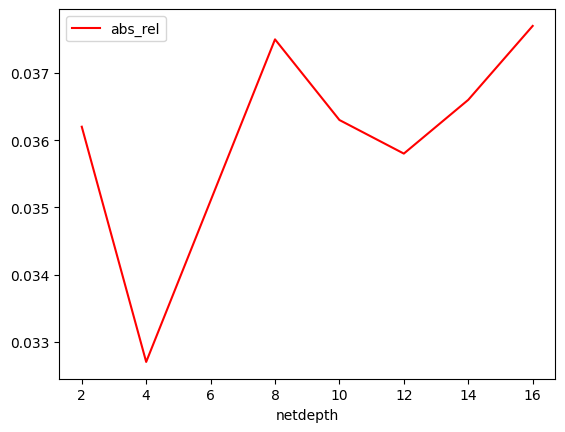

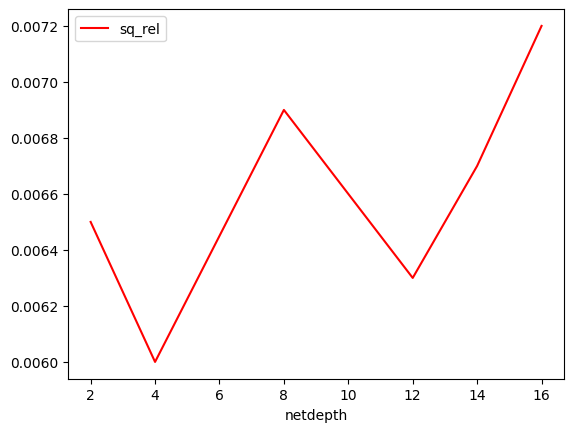

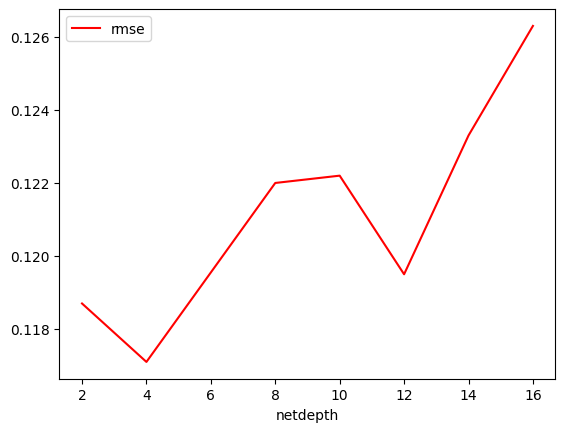

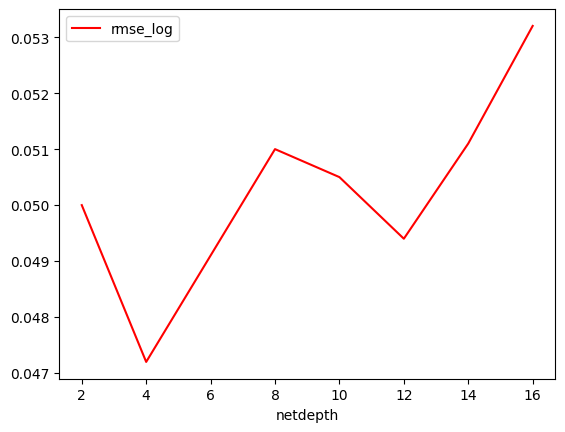

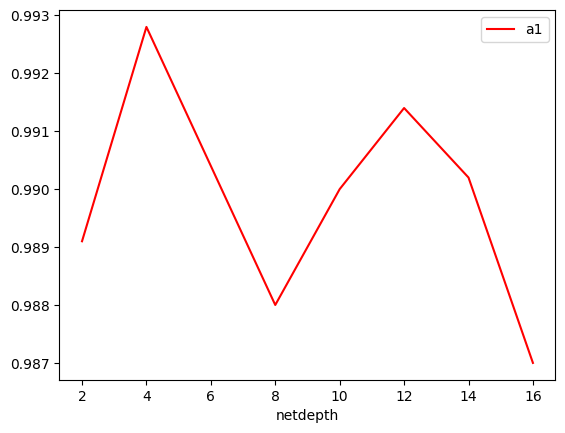

In [108]:
depth_query.plot(kind='line',x='netdepth',y='abs_rel',color='red')
depth_query.plot(kind='line',x='netdepth',y='sq_rel',color='red')
depth_query.plot(kind='line',x='netdepth',y='rmse',color='red')
depth_query.plot(kind='line',x='netdepth',y='rmse_log',color='red')
depth_query.plot(kind='line',x='netdepth',y='a1',color='red')